In [1]:
pip install factor_analyzer

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer


In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(X_scaled)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [6]:
# Printing the factor loadings
print(pd.DataFrame(fa.loadings_, index=X.columns))

                          0         1
sepal length (cm)  0.901205  0.017890
sepal width (cm)  -0.150413  0.986195
petal length (cm)  0.964153 -0.284619
petal width (cm)   0.921401 -0.233245


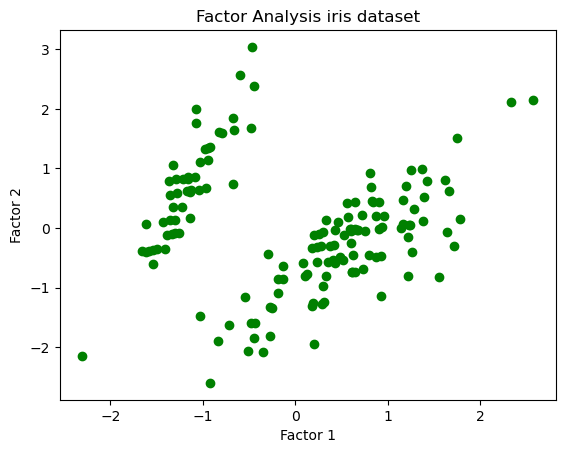

In [7]:
# Plotting the data in the new 2-dimensional space
plt.scatter(fa.transform(X_scaled)[:,0], fa.transform(X_scaled)[:,1],c='g')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor Analysis iris dataset')
plt.show()

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [12]:
from kneed import KneeLocator

k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

3

In [13]:
from sklearn.metrics import silhouette_score

silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_scaled)
    score=silhouette_score(X_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [18]:
silhouette_coefficients

[0.5817500491982808,
 0.4630420362927048,
 0.38349896963394614,
 0.34194697093163473,
 0.32674451109112396,
 0.3359128346505605,
 0.3358210370017559,
 0.3429446547158051,
 0.353209524842123]